## Big Data Cup Submission
### Nicolas Wispinski

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline

In [2]:
womens = pd.read_csv('https://raw.githubusercontent.com/bigdatacup/Big-Data-Cup-2021/main/hackathon_womens.csv')
nwhl = pd.read_csv('https://raw.githubusercontent.com/bigdatacup/Big-Data-Cup-2021/main/hackathon_nwhl.csv')

In [3]:
hockey_data = pd.concat([womens, nwhl], ignore_index=True)

In [4]:
hockey_data.describe()

,Period,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,X Coordinate,Y Coordinate,X Coordinate 2,Y Coordinate 2
count,50884.000000,50884.000000,50884.000000,50884.000000,50884.000000,50884.000000,50884.000000,20784.000000,20784.000000
mean,2.042233,4.865773,4.854925,1.286849,1.025352,96.542508,42.322714,105.548884,42.137173
std,0.862888,0.368332,0.390044,1.473019,1.181912,63.064796,27.871846,59.297857,27.154036
min,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,5.000000,0.000000,0.000000,33.000000,16.000000,54.000000,17.000000
50%,2.000000,5.000000,5.000000,1.000000,1.000000,104.000000,42.000000,110.000000,42.000000
75%,3.000000,5.000000,5.000000,2.000000,2.000000,151.000000,69.000000,157.000000,68.000000
max,4.000000,6.000000,6.000000,6.000000,7.000000,200.000000,85.000000,200.000000,85.000000


In [5]:
hockey_data.head(5)

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,...,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2
0,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,20:00,5,5,0,0,Olympic (Women) - Canada,...,Faceoff Win,100,42,Backhand,NaN,NaN,NaN,Lyudmila Belyakova,NaN,NaN
1,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,19:59,5,5,0,0,Olympic (Women) - Canada,...,Puck Recovery,91,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,19:59,5,5,0,0,Olympic (Women) - Canada,...,Dump In/Out,106,81,Retained,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,19:59,5,5,0,0,Olympic (Women) - Canada,...,Zone Entry,106,81,Dumped,NaN,NaN,NaN,Liana Ganeyeva,NaN,NaN
4,2018-02-11,Olympic (Women) - Canada,Olympic (Women) - Olympic Athletes from Russia,1,19:53,5,5,0,0,Olympic (Women) - Canada,...,Puck Recovery,168,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
hockey_data.tail(5)

,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,...,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2
50879,2021-02-01,Buffalo Beauts,Boston Pride,3,0:06,4,5,1,7,Buffalo Beauts,...,Puck Recovery,8,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50880,2021-02-01,Buffalo Beauts,Boston Pride,3,0:06,4,5,1,7,Buffalo Beauts,...,Play,8,61,Indirect,NaN,NaN,NaN,Cassidy MacPherson,29.0,82.0
50881,2021-02-01,Buffalo Beauts,Boston Pride,3,0:05,4,5,1,7,Buffalo Beauts,...,Dump In/Out,34,84,Lost,NaN,NaN,NaN,NaN,NaN,NaN
50882,2021-02-01,Buffalo Beauts,Boston Pride,3,0:03,4,5,1,7,Boston Pride,...,Puck Recovery,132,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50883,2021-02-01,Buffalo Beauts,Boston Pride,3,0:03,4,5,1,7,Boston Pride,...,Play,132,4,Indirect,NaN,NaN,NaN,Lexie Laing,155.0,6.0


## Data Cleaning

In [7]:
hockey_data.columns

Index(['game_date', 'Home Team', 'Away Team', 'Period', 'Clock',
       'Home Team Skaters', 'Away Team Skaters', 'Home Team Goals',
       'Away Team Goals', 'Team', 'Player', 'Event', 'X Coordinate',
       'Y Coordinate', 'Detail 1', 'Detail 2', 'Detail 3', 'Detail 4',
       'Player 2', 'X Coordinate 2', 'Y Coordinate 2'],
      dtype='object')

In [8]:
hockey_data.rename(columns={'game_date':'date', 'Home Team':'home', 'Away Team':'away', 'Period':'period', 
                            'Clock':'clock','Home Team Skaters':'home_skaters', 'Away Team Skaters':'away_skaters', 
                            'Home Team Goals':'home_goals','Away Team Goals':'away_goals', 'Team':'team', 
                            'Player':'player', 'Event':'event', 'X Coordinate':'x','Y Coordinate':'y', 
                            'Detail 1':'detail_1', 'Detail 2':'detail_2', 'Detail 3':'detail_3', 'Detail 4':'detail_4',
                            'Player 2':'player_2', 'X Coordinate 2':'x_2', 'Y Coordinate 2':'y_2'},
                  inplace=True)

In [9]:
hockey_data.columns

Index(['date', 'home', 'away', 'period', 'clock', 'home_skaters',
       'away_skaters', 'home_goals', 'away_goals', 'team', 'player', 'event',
       'x', 'y', 'detail_1', 'detail_2', 'detail_3', 'detail_4', 'player_2',
       'x_2', 'y_2'],
      dtype='object')

In [10]:
hockey_data.replace({'Olympic (Women) - United States':'USA', 'Buffalo Beauts':'Beauts', 'Olympic (Women) - Canada':'Canada',
                    'Toronto Six':'Six', 'Olympic (Women) - Finland':'Finland', 'Connecticut Whale':'Whale',
                    'Boston Pride':'Pride', 'Metropolitan Riveters':'Riveters', 'St. Lawrence Saints':'Saints',
                    'Clarkson Golden Knights':'GoldenKnights', 'Minnesota Whitecaps':'Whitecaps', 
                    'Olympic (Women) - Olympic Athletes from Russia':'OAR'}, 
                    inplace=True)

## Creating Features

In [11]:
hockey_data['is_home'] = hockey_data['team'].equals(hockey_data['home'])
hockey_data['is_home'] = hockey_data['is_home'].map({True:1, False:0})

In [12]:
hockey_data['home_advantage'] = hockey_data['home_skaters'] - hockey_data['away_skaters']

In [13]:
hockey_data['clock'] = (pd.to_datetime(hockey_data['clock'], format='%M:%S') 
                        - pd.to_datetime(hockey_data['clock'], format='%M:%S').dt.normalize())

In [14]:
hockey_data['game_id'] = hockey_data['home'] + 'VS'
hockey_data['game_id'] = hockey_data['game_id'] + hockey_data['away']
hockey_data['game_id'] = hockey_data['game_id'] + hockey_data['date']

In [15]:
hockey_data['level'] = hockey_data['team'].apply(lambda x: 1 if x == 'USA' or x == 'Canada' or x == 'Finland' or x == 'OAR'
                                                 else (3 if x == 'Golden Knights' or x == 'Saints' else 2))

In [16]:
hockey_data['clock_delta'] = abs(pd.to_timedelta(hockey_data['clock'].astype(str)).diff().dt.total_seconds())

In [17]:
x = 1
for i in range(0, len(hockey_data.index)):
    if hockey_data.loc[i, 'event'] == 'Faceoff Win':
        hockey_data.loc[i, 'play_id'] = x
        hockey_data.loc[i, 'clock_delta'] = 0
        x += 1
    elif hockey_data.loc[i-1, 'team'] == hockey_data.loc[i, 'team']:
        hockey_data.loc[i, 'play_id'] = hockey_data.loc[i-1, 'play_id']
        hockey_data.loc[i, 'prev_event'] = hockey_data.loc[i-1, 'event']
    else:
        hockey_data.loc[i, 'play_id'] = x
        hockey_data.loc[i, 'prev_event'] = hockey_data.loc[i-1, 'event']        
        x += 1

In [18]:
for j in range(1, len(hockey_data.index)):
    if hockey_data.loc[j-1, 'event'] == 'play':
        hockey_data.loc[j, 'prev_event_distance'] = np.sqrt((hockey_data.loc[j-1,'x_2']-hockey_data.loc[j,'x'])**2 +
                                                           (hockey_data.loc[j-1,'y_2']-hockey_data.loc[j,'y'])**2)
    elif hockey_data.loc[j, 'event'] == 'Faceoff Win':
        hockey_data.loc[j, 'prev_event_distance'] == np.nan
    else:
        hockey_data.loc[j, 'prev_event_distance'] = np.sqrt((hockey_data.loc[j-1,'x']-hockey_data.loc[j,'x'])**2 +
                                                           (hockey_data.loc[j-1,'y']-hockey_data.loc[j,'y'])**2)

In [19]:
hockey_data['net_distance'] = ((hockey_data['x']-189)**2+(hockey_data['y']-42.5)**2)**0.5

In [20]:
hockey_data['net_angle'] = (abs(42.5-hockey_data['y'])/abs(hockey_data['net_distance']))
hockey_data['net_angle'] = abs(hockey_data['net_angle'].apply(lambda x: math.asin(x)))

In [21]:
goals = hockey_data.loc[hockey_data['event']=='Goal']
shots = hockey_data.loc[hockey_data['event']=='Shot']

In [22]:
on_net = shots.loc[shots['detail_2']=='On Net']

In [23]:
X = pd.concat([goals, on_net])

In [24]:
X.rename(columns={'detail_1':'shot_type', 'detail_3':'traffic', 'detail_4':'one_timer'}, inplace=True)

In [25]:
events = pd.get_dummies(X.prev_event)
X = pd.concat([X, events], axis=1)

In [26]:
X.traffic = X.traffic.map({'t':1, 'f':0})
X.one_timer = X.one_timer.map({'t':1, 'f':0})
X.event = X.event.map({'Goal':1, 'Shot':0})

In [27]:
y = X.event
z = X.play_id
X.drop(columns=['date', 'period', 'home', 'away', 'team', 'player', 'detail_2', 'player_2', 'shot_type', 'event', 
                'prev_event', 'clock','home_goals', 'away_goals', 'home_skaters', 'away_skaters', 'game_id', 'play_id', 
                'x', 'y', 'x_2', 'y_2',], 
       inplace=True)

In [28]:
X.fillna(0, inplace=True)

In [29]:
X.iloc[99]

traffic                0.000000
one_timer              0.000000
is_home                0.000000
home_advantage         0.000000
level                  2.000000
clock_delta            0.000000
prev_event_distance    0.000000
net_distance           6.800735
net_angle              0.942000
Play                   0.000000
Puck Recovery          1.000000
Shot                   0.000000
Takeaway               0.000000
Zone Entry             0.000000
Name: 41290, dtype: float64

## Expected Goals Model

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg = LogisticRegression(random_state=99, max_iter=400).fit(X, y)

In [32]:
pred = logreg.predict(X)

In [33]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds, X.columns, columns=['coef'])

,coef
traffic,1.444452
one_timer,1.284082
is_home,1.000000
home_advantage,1.028483
level,1.242477
clock_delta,0.670693
prev_event_distance,1.016646
net_distance,0.948785
net_angle,0.447064
Play,1.030968


In [34]:
X['expected_goals'] = logreg.predict_proba(X)[:, 1]

In [35]:
X['predict_goal'] = X['expected_goals'].apply(lambda x: 1 if x> X['expected_goals'].quantile(0.85) else 0)

## Decision Tree

In [36]:
olympic = X.loc[X['level']==1]
nwhl = X.loc[X['level']==2]
ncaa =  X.loc[X['level']==3]

In [37]:
y=X.predict_goal
X.drop(columns={'predict_goal', 'expected_goals'}, inplace=True)

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [39]:
treereg = DecisionTreeRegressor(random_state=99, max_depth=3)
treereg

DecisionTreeRegressor(max_depth=3, random_state=99)

In [40]:
treereg.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=99)

In [41]:
pd.DataFrame({'feature':X.columns, 'importance':treereg.feature_importances_})

,feature,importance
0,traffic,0.000000
1,one_timer,0.036280
2,is_home,0.000000
3,home_advantage,0.000000
4,level,0.000000
5,clock_delta,0.028033
6,prev_event_distance,0.011914
7,net_distance,0.470002
8,net_angle,0.382604
9,Play,0.000000


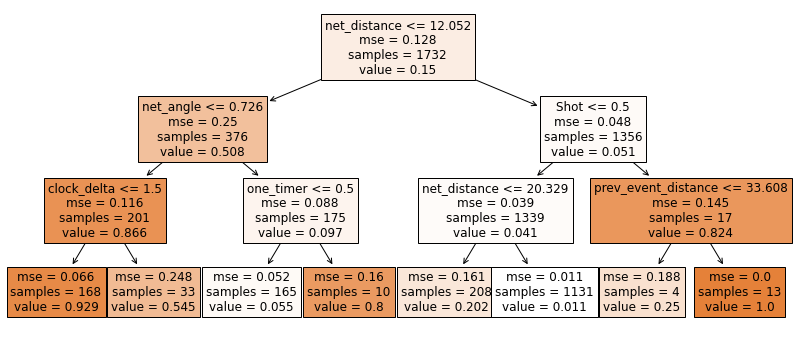

In [42]:
fig, ax = plt.subplots(1,1, figsize=(14,6))
plot_tree(treereg, feature_names=X.columns, fontsize=12, filled=True);

In [43]:
olympic_y = olympic.predict_goal
olympic_X = olympic.drop(columns={'predict_goal', 'expected_goals'})

nwhl_y = nwhl.predict_goal
nwhl_X = nwhl.drop(columns={'predict_goal', 'expected_goals'})

ncaa_y = ncaa.predict_goal
ncaa_X = ncaa.drop(columns={'predict_goal', 'expected_goals'})

In [44]:
olympictree = DecisionTreeRegressor(random_state=99, max_depth=3)
olympictree

DecisionTreeRegressor(max_depth=3, random_state=99)

In [45]:
olympictree.fit(olympic_X, olympic_y)

DecisionTreeRegressor(max_depth=3, random_state=99)

In [46]:
pd.DataFrame({'feature':olympic_X.columns, 'importance':olympictree.feature_importances_})

,feature,importance
0,traffic,0.000000
1,one_timer,0.024068
2,is_home,0.000000
3,home_advantage,0.000000
4,level,0.000000
5,clock_delta,0.044406
6,prev_event_distance,0.014570
7,net_distance,0.454288
8,net_angle,0.360350
9,Play,0.000000


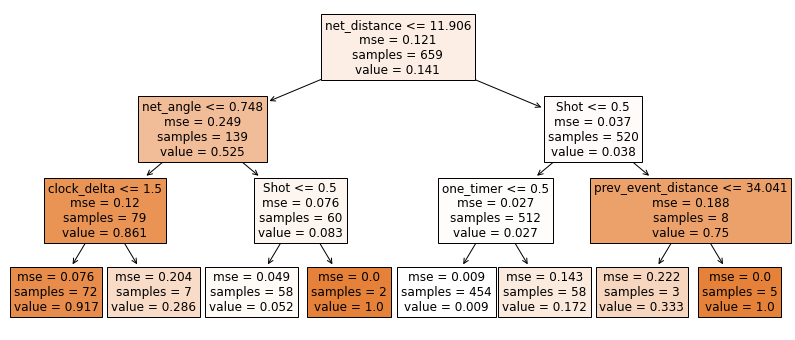

In [47]:
fig, ax = plt.subplots(1,1, figsize=(14,6))
plot_tree(olympictree, feature_names=olympic_X.columns, fontsize=12, filled=True);

In [48]:
nwhltree = DecisionTreeRegressor(random_state=99, max_depth=3)
nwhltree

DecisionTreeRegressor(max_depth=3, random_state=99)

In [49]:
nwhltree.fit(nwhl_X, nwhl_y)

DecisionTreeRegressor(max_depth=3, random_state=99)

In [50]:
pd.DataFrame({'feature':nwhl_X.columns, 'importance':nwhltree.feature_importances_})

,feature,importance
0,traffic,0.000000
1,one_timer,0.064810
2,is_home,0.000000
3,home_advantage,0.000000
4,level,0.000000
5,clock_delta,0.000000
6,prev_event_distance,0.009972
7,net_distance,0.457829
8,net_angle,0.410533
9,Play,0.000000


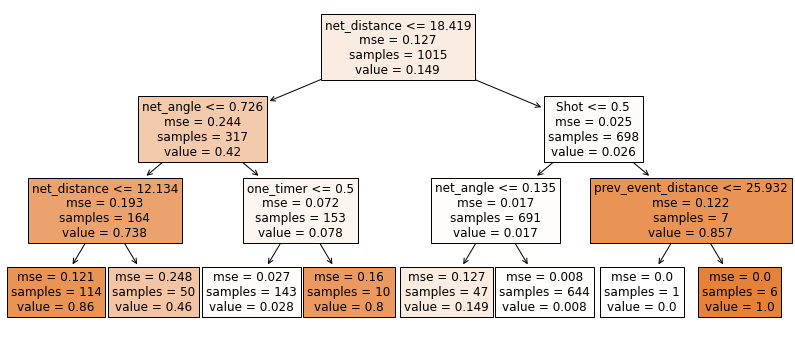

In [51]:
fig, ax = plt.subplots(1,1, figsize=(14,6))
plot_tree(nwhltree, feature_names=nwhl_X.columns, fontsize=12, filled=True);

In [52]:
ncaatree = DecisionTreeRegressor(random_state=99, max_depth=3)
ncaatree

DecisionTreeRegressor(max_depth=3, random_state=99)

In [53]:
ncaatree.fit(ncaa_X, ncaa_y)

DecisionTreeRegressor(max_depth=3, random_state=99)

In [54]:
pd.DataFrame({'feature':ncaa_X.columns, 'importance':ncaatree.feature_importances_})

,feature,importance
0,traffic,0.079100
1,one_timer,0.000000
2,is_home,0.000000
3,home_advantage,0.020577
4,level,0.000000
5,clock_delta,0.000000
6,prev_event_distance,0.000000
7,net_distance,0.506771
8,net_angle,0.308490
9,Play,0.000000


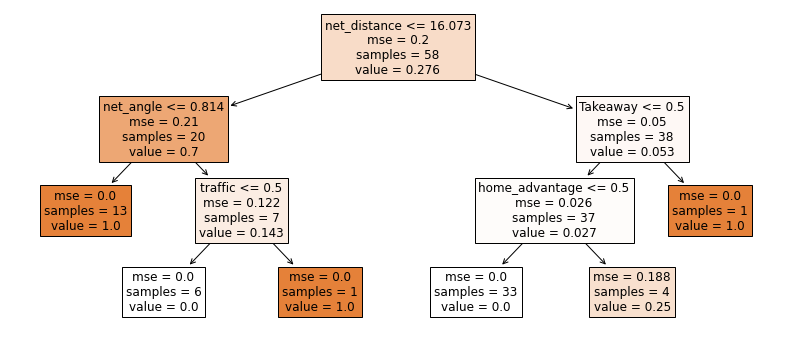

In [55]:
fig, ax = plt.subplots(1,1, figsize=(14,6))
plot_tree(ncaatree, feature_names=ncaa_X.columns, fontsize=12, filled=True);